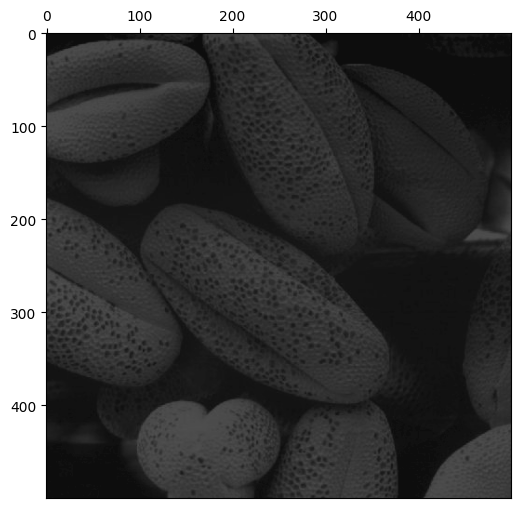

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('a1images\shells.tif')

fig, ax = plt.subplots(1, 1, figsize=(6, 8))
ax.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax.xaxis.set_ticks_position('top')
plt.show()

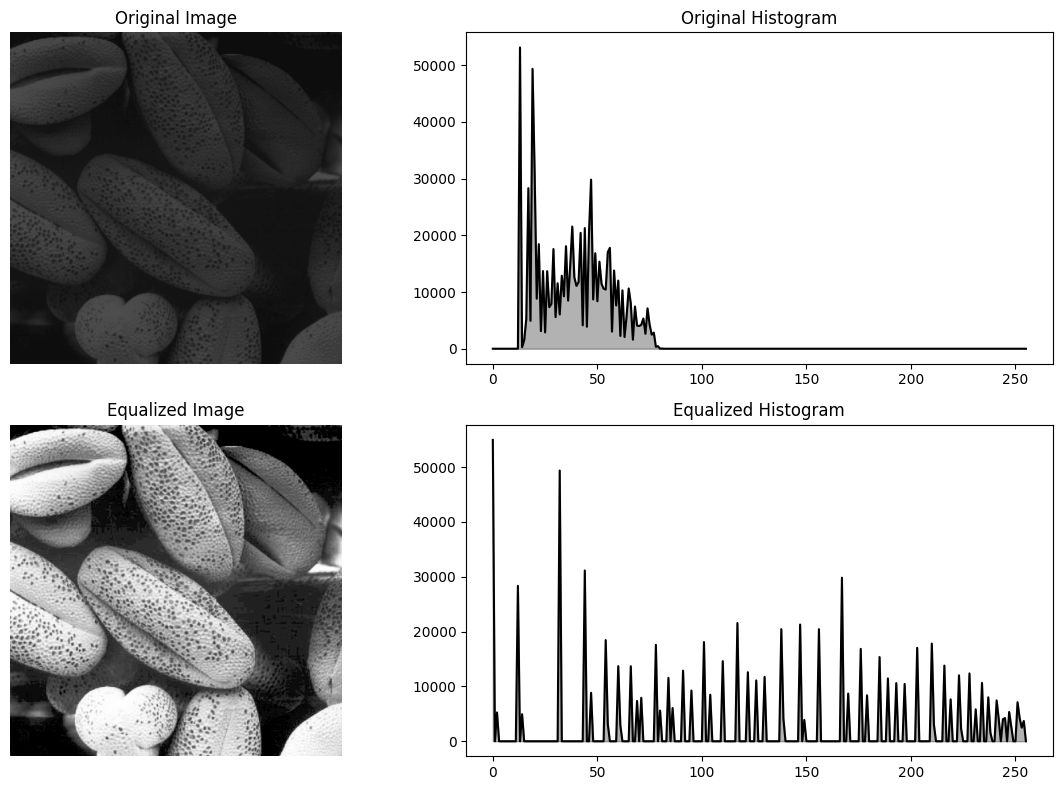

In [2]:
# Step 1: Calculate the histogram of the original image
hist, bins = np.histogram(image.flatten(), 256, [0, 256])

# Step 2: Compute the cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize the CDF for visualization (Optional)
cdf_normalized = cdf * hist.max() / cdf.max()

# Step 3: Mask CDF values where the CDF is 0 and normalize the rest
cdf_m = np.ma.masked_equal(cdf, 0)  # Mask pixels where CDF is 0
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize to 0-255 range
cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill the masked values with 0 and convert to uint8

# Step 4: Use the CDF to remap pixel values in the original image
equalized_image = cdf[image]

# Step 5: Calculate the histogram of the equalized image
equalized_hist, bins = np.histogram(equalized_image.flatten(), 256, [0, 256])

# Step 6: Plot the results
plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Original Histogram
plt.subplot(2, 2, 2)
plt.title('Original Histogram')
plt.plot(hist, color='black')
plt.fill_between(range(256), hist, color='black', alpha=0.3)

# Equalized Image
plt.subplot(2, 2, 3)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')

# Equalized Histogram
plt.subplot(2, 2, 4)
plt.title('Equalized Histogram')
plt.plot(equalized_hist, color='black')
plt.fill_between(range(256), equalized_hist, color='black', alpha=0.3)

# Display all plots
plt.tight_layout()
plt.show()
